# Parcial 3

In [205]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm



## 7.


Partiendo de la ecuación de onda unidimensional dada por la siguiente expresión,

$$
\frac{\partial ^2u}{\partial t^2}=\alpha^2 \frac{\partial^2u}{\partial x^2}
$$

se busca llegar a que esta solución es estable para $\alpha <1$. De este modo, si se realiza la discretización de la ecuación inicial, a partir de los siguientes operadores diferenciales:

$$
\frac{f(x_i,t_{l+1})-2f(x_i,t_{l})+f(x_i,t_{l-1})}{(\Delta x)^2}=\alpha^2\frac{f(x_{i+1},t_{l})-2f(x_i,t_{l})+f(x_{i-1},t_{l})}{(\Delta x)^2}
$$

de modo que para la función $u(x_i,t_i)$ y despejando para $u^{l+1}_i$, se tendría que,

$$
\begin{align*}
u^{l+1}_i&=\alpha^2[u^l_{i+1}-2u_i^{l}+u_{i-1}^l] +2u_i^l-u_i^{l-1}\\
&=\alpha^2(u^l_{i+1}+u_{i-1}^l)+2(1-\alpha^2)u_i^{l}+-u_i^{l-1}
\end{align*}
$$

donde $\alpha=\frac{v\Delta t}{\Delta x}$.


Usando el hecho de que las componentes de Fourierb varían en el espacio como:
$$
u^l_{i\pm 1}=e^{\pm jk\Delta x}u[l,i]
$$

de modo que se llegaría a lo siguientel, al implementar este término en la parte de la discretización que multiplica a $\alpha^2$.

$$
\begin{align*}
u^{l+1}_i-2u_i^l+u_i^{l-1}&=[e^{jk\Delta x}-2+e^{- jk\Delta x}]u_i^l\\
&=-4sin^2 \Big(\frac{k\Delta x}{2} \Big)u_i^l
\end{align*}
$$

ingresando este término en la discretización, se llega a:

$$
\begin{align*}
u^{l+1}_i&=\alpha^2\Big[-4sin^2 \Big(\frac{k\Delta x}{2} \Big)u_i^l\Big] +2u_i^l-u_i^{l-1}\\
&=\Big[2-4\alpha^2sin^2 \Big(\frac{k\Delta x}{2} \Big)\Big]u_i^l-u_i^{l-1}
\end{align*}
$$

dada la condición de estabilidad, se debería cumplir que,

$$
\begin{align*}
2&>-2+4\alpha^2sin^2 \Big(\frac{k\Delta x}{2} \Big)\\
4&>4\alpha^2sin^2 \Big(\frac{k\Delta x}{2} \Big)\\
1&>\alpha^2sin^2 \Big(\frac{k\Delta x}{2} \Big)
\end{align*}
$$


dado que el término del seno, máximo dará 1 para casos donde los modos de Fourier sean muy grandes, entonces,

$$
\alpha^2<1 \Rightarrow |a|<1
$$



## 8.

In [303]:
D=0.01
a=0.2
b=0.3
E=0.03


Nt = 1000
Nx = 50

u = np.linspace(0,1,Nx)
w=np.linspace(0,1,Nx)
t = np.linspace(0,10,Nt)

deltau = u[1] - u[0]
deltaw = w[1] - w[0]
deltat = t[1] - t[0]
lambda_=D*deltat/deltau**2
if lambda_>1/2:
    print("error")

In [304]:
def h1():
    numero=np.random.uniform(0, 0.3)
    return numero

In [305]:
def initT():
    T = np.zeros((Nt,Nx))
    T[0]=h1()
    T[:,0] = 0.1
    T[:,-1]=0.2
    
    return T
def initWt():
    T = np.zeros((Nt,Nx))
    return T

In [306]:
T = initT()
wt= initWt()

In [314]:
def GetSolution(T):
    
    for l in tqdm(range(1,len(t))):
         
        for i in range(1,len(u)-1):
            
            T[l,i] = T[l-1,i] + lambda_*( T[l-1,i+1] - 2*T[l-1,i] + T[l-1,i-1] )+ deltat*((-T[l-1,i]+ wt[l-1,i]*(-a+T[l-1,i])*(1-T[l-1,i])))
            wt[l,i]= wt[l-1,i] + deltat*(E*(T[l-1,i]-b*wt[l-1,i] ))
            

            

In [315]:
GetSolution(T)

100%|██████████| 999/999 [00:00<00:00, 2747.04it/s]


In [316]:
T

array([[0.1       , 0.18468775, 0.18468775, ..., 0.18468775, 0.18468775,
        0.2       ],
       [0.1       , 0.16248514, 0.18283903, ..., 0.18283903, 0.18651918,
        0.2       ],
       [0.1       , 0.15073281, 0.17611694, ..., 0.18189329, 0.18700761,
        0.2       ],
       ...,
       [0.1       , 0.08119637, 0.06588244, ..., 0.13234981, 0.16275565,
        0.2       ],
       [0.1       , 0.08119608, 0.06588194, ..., 0.13234919, 0.16275532,
        0.2       ],
       [0.1       , 0.08119578, 0.06588144, ..., 0.13234858, 0.16275499,
        0.2       ]])

In [317]:
wt

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.54617872e-05, 5.54617872e-05, ...,
        5.54617872e-05, 5.54617872e-05, 0.00000000e+00],
       [0.00000000e+00, 1.04251128e-04, 1.10363405e-04, ...,
        1.10363405e-04, 1.11468555e-04, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.40083698e-02, 2.02786919e-02, ...,
        3.89560148e-02, 4.71403902e-02, 0.00000000e+00],
       [0.00000000e+00, 2.40305902e-02, 2.02966495e-02, ...,
        3.89922500e-02, 4.71850189e-02, 0.00000000e+00],
       [0.00000000e+00, 2.40528085e-02, 2.03146053e-02, ...,
        3.90284816e-02, 4.72296434e-02, 0.00000000e+00]])

<IPython.core.display.Javascript object>


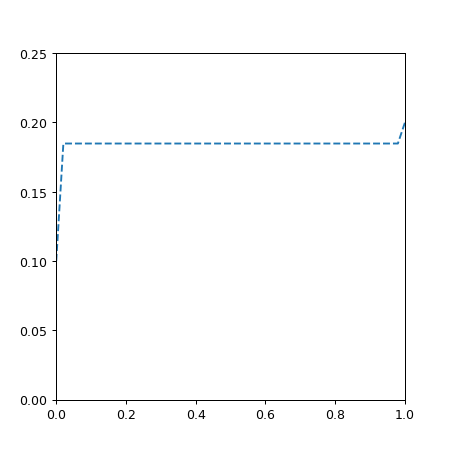

In [318]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.clear()
    ax.set_xlim(u[0],u[-1])
    ax.set_ylim(0,0.25)
    
def Update(i):
    
    init()
    ax.plot(u,T[i,:],'--', label=r'Potencial de acción(u(x,t)' %(t[i]))
    ax.plot(w,wt[i,:],'**', label=r'Potencial de recuperación(w(x,t)' %(t[i]))
    ax.legend()
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)

## 10.

In [274]:
Nx = 60
Nt = 500
Ny=60
x = np.linspace(-5.,5.,Nx)
y=np.linspace(-5.,5.,Ny)
t = np.linspace(0.,10.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]
dy=y[1]-y[0]

v = 0.3

In [275]:
def Ti(x,y):
    return 5*np.exp(-(x**2+y**2))

In [276]:
def InitT():
    
    u = np.zeros((Nt,Nx,Ny))
    for i in range(Nx):
        for j in range(Ny):
            u[0,i,j]=Ti(x[i],y[j])
    return u

In [277]:
u=InitT()

In [278]:
def h1(t):
    return 0. 

In [282]:
def GetSolution(u):
    
    for l in tqdm(range(1,len(t))):
        u[l,0,0]=h1(t[l])
        u[l,-1,-1]=h1(t[l])
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                u[l,i,j] =   dt*(-u[l-1,i,j]*(u[l-1,i+1,j]-u[l-1,i-1,j])/(2*dx) + v*(u[l-1,i+1,j]-2*u[l-1,i,j]+u[l-1,i-1,j])/(dx**2) \
                -u[l-1,i,j]*(u[l-1,i,j+1]-u[l-1,i,j-1])/(2*dy) + v*(u[l-1,i,j+1]-2*u[l-1,i,j]+u[l-1,i,j-1])/(dy**2))+u[l-1,i,j]
                


In [283]:
GetSolution(u)


100%|██████████| 499/499 [00:17<00:00, 28.49it/s]


<IPython.core.display.Javascript object>


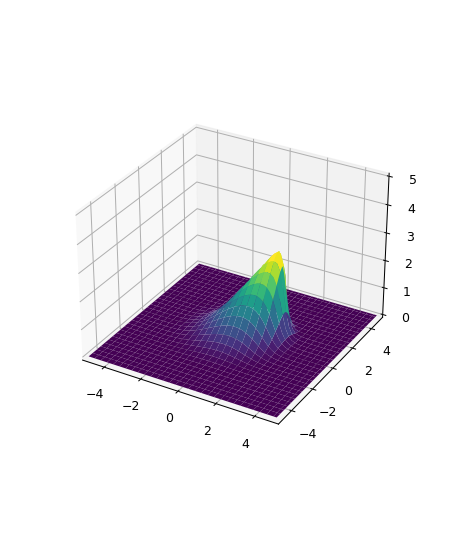

In [284]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    ax.set_zlim3d(0,5)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)